In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import os
drive_path = '/content/drive/My Drive'
os.chdir(os.path.join(drive_path, 'Seismology/data8PMB/SRM'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from mpl_toolkits import mplot3d

In [ ]:
import numpy as np
from numpy.fft import rfft, irfft, fft, ifft
import scipy.signal as sig
import scipy.io.wavfile as wav
from scipy.signal.windows import hann
from glob import glob

In [ ]:
def fast_qtransform(x, y, qval, yeval):
    """Connor's qtransform code"""
    q = np.zeros((len(x), len(yeval)), dtype='complex')
    dx = x[1] - x[0]
    num = len(x)
    freqs = np.fft.fftfreq(num, dx)
    yft = np.fft.fft(y)*dx
    for i in range(0, len(yeval)):
        fi = yeval[i]
        shift = int(fi/(freqs[1]-freqs[0]))
        nstart = int((num + num%2)/2)
        yfti = np.zeros((len(yft)), dtype='complex')
        yfti[0:nstart-shift] += yft[shift:nstart]
        yfti[nstart:-shift] += yft[nstart+shift:]
        yfti[-shift:] += yft[:shift]
        windown = int(qval/(fi*dx)) - int(qval/(fi*dx))%2
        windowy = np.zeros((num), dtype='float')
        windowy[:int(windown/2)] += hann(windown)[-int(windown/2):]
        windowy[int(-windown/2):] += hann(windown)[:int(windown/2)]
        windowy *= 1./np.sum(windowy)
        windowft = np.fft.fft(windowy)*dx
        windowfti = 1j*windowft
        qft = np.fft.ifft(yfti*np.conj(windowft))*(freqs[1]-freqs[0])*num
        qfti = np.fft.ifft(yfti*np.conj(windowfti))*(freqs[1]-freqs[0])*num
        q[:, i] = (qft*np.conj(qft) + qfti*np.conj(qfti))/np.sum(windowft*np.conj(windowft))
    return np.abs(q)

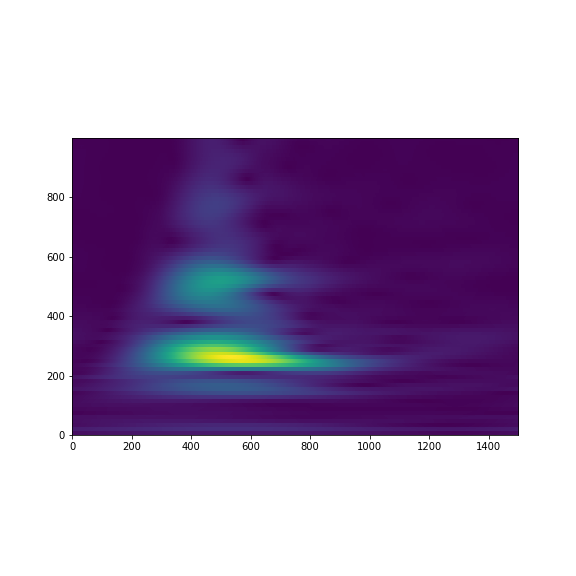

In [ ]:
tmp = data[idx-500:idx+1000].astype(np.float32)
tmp = tmp - tmp.mean()
tmp /= np.max(np.abs(tmp))

qval = 7
q = fast_qtransform(np.arange(1500)/1e7, tmp, 7, np.linspace(1e5,6e5,1000))
plt.figure(figsize=(8,8))
plt.imshow(q.T**0.5, origin='lower')

In [ ]:
tmp = fchans[1][idxmax-10000:idxmax+10000].astype(np.float32)
tmp = tmp - tmp.mean()
tmp /= np.max(np.abs(tmp))
wav.write('scream.wav', 5000, tmp)

In [ ]:
rmsall = np.sqrt(rms1**2+rms2**2+rms3**2)

In [ ]:
events = np.linspace(0, 16, 16000)[rmsall > 4]
len(events)

12

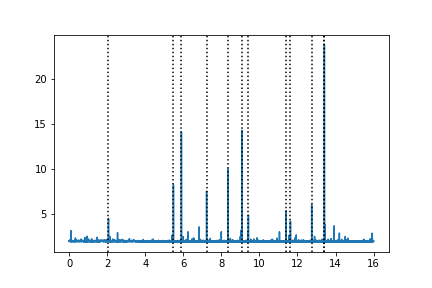

In [ ]:
plt.plot(np.linspace(0,16, 16000), rmsall)
for tt in events:
  plt.axvline(tt, ls=':', c='k')

In [ ]:
snippets = []
for idx in (10000*np.arange(16000))[rmsall > 4]:
  snippets.append([fchans[jj][idx-10000:idx+20000] for jj in [1,2,3]])
snippets = np.array(snippets)

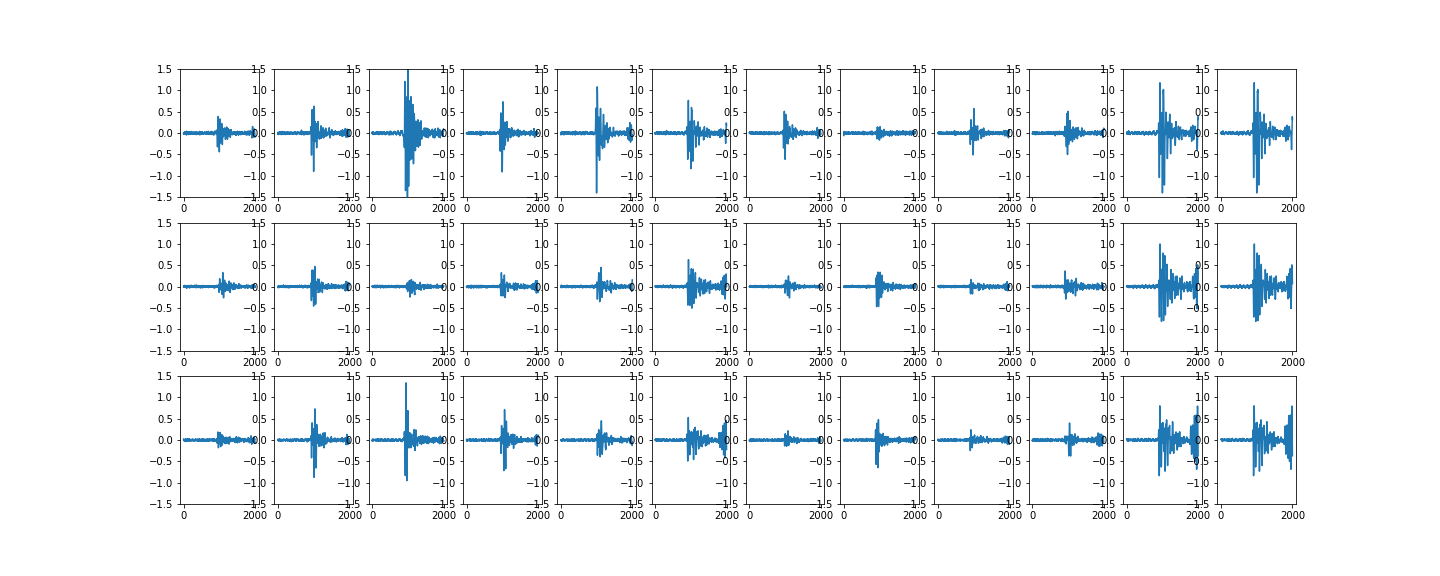

In [ ]:
fig, axs = plt.subplots(3, 12, figsize=(20,8))
for ii in range(12):
  for jj in range(3):
    maxidx = np.abs(snippets[ii, 0]).argmax()
    axs[jj, ii].plot(snippets[ii, jj][maxidx-1000:maxidx+1000])
    axs[jj, ii].set_ylim(-1.5,1.5)

In [ ]:
20000/1e7

0.002

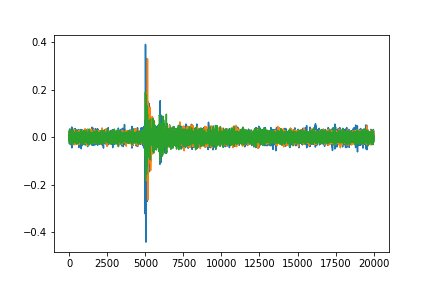

In [ ]:
plt.plot(snippets[0][0])
plt.plot(snippets[0][1])
plt.plot(snippets[0][2])

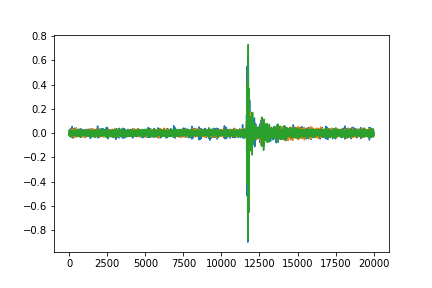

In [ ]:
plt.plot(snippets[1][0])
plt.plot(snippets[1][1])
plt.plot(snippets[1][2])

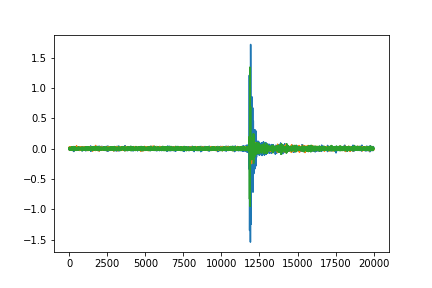

In [ ]:
plt.plot(snippets[2][0])
plt.plot(snippets[2][1])
plt.plot(snippets[2][2])

In [ ]:
twin = sig.hann(30000)

In [ ]:
fs1 = rfft(twin*snippets[0][0])
fs2 = rfft(twin*snippets[0][1])
fs3 = rfft(twin*snippets[0][2])

564
1.7788091729517297


(59000, 61000)

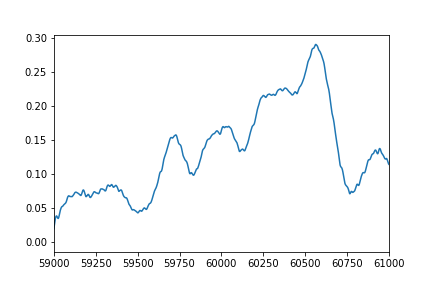

In [ ]:
igrand = np.zeros(120000, dtype=np.complex64)
igrand[:15001] = (fs2*fs1.conjugate())

snr = np.roll(ifft(igrand),60000)
maxsnr = np.abs(snr).argmax()
print(maxsnr-60000)
print(np.angle(snr[maxsnr]))

plt.plot(np.abs(snr))
plt.xlim(60000-1000,60000+1000)

In [ ]:
plt.plot(irfft(fs1))
plt.plot()

In [ ]:
7000*(63/1e7)

0.0441

In [ ]:
5000*141/1e7

0.0705